# Introduction to regression

In [1]:
# import tensorflow
import tensorflow as tf 

print(tf.__version__)

2023-06-12 18:09:19.984879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


In [3]:
# import matplotlip and numpy
import matplotlib.pyplot as plt
import numpy as np


In [96]:
# create some test data
x = np.array([-0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9])
y = np.array([2, 4, 6, 8, 10, 12, 13])

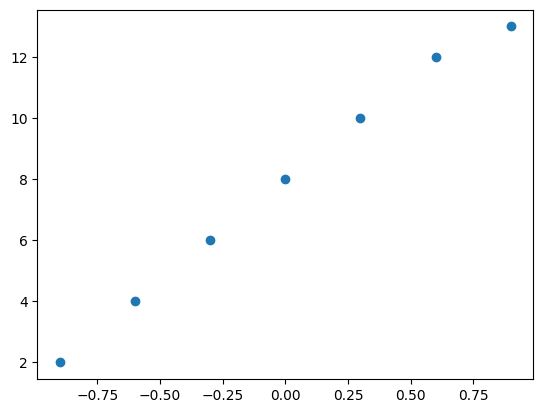

In [97]:
# visualize our data

plt.scatter(x,y)

In [100]:
y == x + 2


array([False, False, False, False, False, False, False])

In [101]:
# input and output shapes
x_shape = x.shape
y_shape = y.shape

x_shape, y_shape

x[0], y[0]



(-0.9, 2)

In [102]:
# convert out numpy to tensors
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)


x[0].shape,y[0].shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with tensorflow

1. create a model - define the input and output layers aswell as hideeen layers of the DL model
2. Compile the model - define the loos function (the function that tells our model how wrongit it is), the optimizer (tell how model how to improve the pattern it is learning) and eveluation metrix (what we can use to interprete he performance of our model)
3. fitting a model - letting the model try to find patterns btw x and y (features and labels)

In [148]:
tf.random.set_seed(42)

# step one - create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])


# Step two - compile the model
model.compile(
    loss= tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),
    metrics=["mae"]

)

model.fit(tf.expand_dims(x, axis=-1),y, epochs=50)



Epoch 1/50
1/1 [==============================] - 1s 892ms/step - loss: 7.8571 - mae: 7.8571
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 5.4018 - mae: 5.4018
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 3.0650 - mae: 3.0650
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.7957 - mae: 0.7957
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 1.4560 - mae: 1.4560
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 0.8911 - mae: 0.8911
Epoch 7/50
1/1 [==============================] - 0s 70ms/step - loss: 0.3739 - mae: 0.3739
Epoch 8/50
1/1 [==============================] - 0s 28ms/step - loss: 2.1462 - mae: 2.1462
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 0.6712 - mae: 0.6712
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 2.5822 - mae: 2.5822
Epoch 11/50
1/1 [==============================] - 0s 23ms/step - loss: 3.3700

In [113]:
x,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-0.9, -0.6, -0.3,  0. ,  0.3,  0.6,  0.9], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 2.,  4.,  6.,  8., 10., 12., 13.], dtype=float32)>)

In [150]:
# predict y value from x value

y_pred = model.predict([1.2])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[14.940978]], dtype=float32)

In [44]:
y_pred + 9.7

array([[25.852879]], dtype=float32)

# Let's try a bigger dataset

In [155]:
x = tf.range(-100, 101, 3)
x

y = x + 5
x,y

(<tf.Tensor: shape=(67,), dtype=int32, numpy=
 array([-100,  -97,  -94,  -91,  -88,  -85,  -82,  -79,  -76,  -73,  -70,
         -67,  -64,  -61,  -58,  -55,  -52,  -49,  -46,  -43,  -40,  -37,
         -34,  -31,  -28,  -25,  -22,  -19,  -16,  -13,  -10,   -7,   -4,
          -1,    2,    5,    8,   11,   14,   17,   20,   23,   26,   29,
          32,   35,   38,   41,   44,   47,   50,   53,   56,   59,   62,
          65,   68,   71,   74,   77,   80,   83,   86,   89,   92,   95,
          98], dtype=int32)>,
 <tf.Tensor: shape=(67,), dtype=int32, numpy=
 array([-95, -92, -89, -86, -83, -80, -77, -74, -71, -68, -65, -62, -59,
        -56, -53, -50, -47, -44, -41, -38, -35, -32, -29, -26, -23, -20,
        -17, -14, -11,  -8,  -5,  -2,   1,   4,   7,  10,  13,  16,  19,
         22,  25,  28,  31,  34,  37,  40,  43,  46,  49,  52,  55,  58,
         61,  64,  67,  70,  73,  76,  79,  82,  85,  88,  91,  94,  97,
        100, 103], dtype=int32)>)

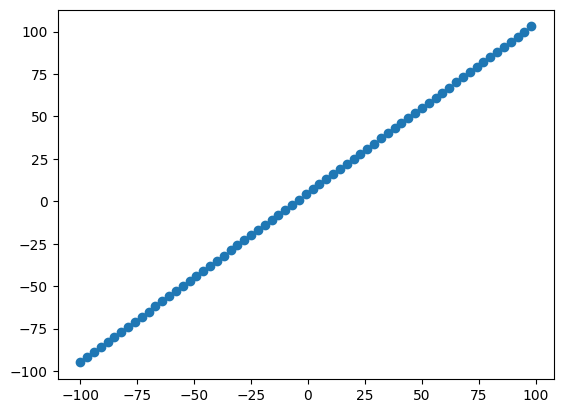

In [158]:
plt.scatter(x,y)

In [159]:
x_train =x[:50]
x_train

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -97,  -94,  -91,  -88,  -85,  -82,  -79,  -76,  -73,  -70,
        -67,  -64,  -61,  -58,  -55,  -52,  -49,  -46,  -43,  -40,  -37,
        -34,  -31,  -28,  -25,  -22,  -19,  -16,  -13,  -10,   -7,   -4,
         -1,    2,    5,    8,   11,   14,   17,   20,   23,   26,   29,
         32,   35,   38,   41,   44,   47], dtype=int32)>